In [2]:
from stable_baselines3 import DDPG, DQN, A2C
from Landscape import Region
from enviorment import GPSD_ENV
from stable_baselines3.common.noise import NormalActionNoise
import numpy as np 
import torch 
from stable_baselines3.dqn.policies import QNetwork
from stable_baselines3.common.env_checker import check_env
landscape = Region((103.809643,1.243246,103.904400,1.325623), hex_size=75, years=[2018]) 
env = GPSD_ENV(landscape.images[2018], start_position=[1,1], target_position=[3,3])

/opt/anaconda3/envs/research/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange
/opt/anaconda3/envs/research/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/anaconda3/envs/research/lib/python3.12/site-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/s

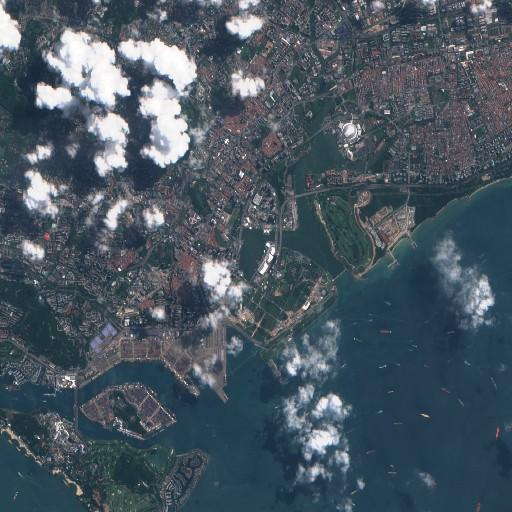

In [3]:
landscape.images[2018].Input_Image.image

In [4]:
check_env(env, warn=True)

/opt/anaconda3/envs/research/lib/python3.12/site-packages/stable_baselines3/common/env_checker.py:54: UserWarning: It seems that your observation  is an image but its `dtype` is (float32) whereas it has to be `np.uint8`. If your observation is not an image, we recommend you to flatten the observation to have only a 1D vector
  warnings.warn(
/opt/anaconda3/envs/research/lib/python3.12/site-packages/stable_baselines3/common/env_checker.py:62: UserWarning: It seems that your observation space  is an image but the upper and lower bounds are not in [0, 255]. Because the CNN policy normalize automatically the observation you may encounter issue if the values are not in that range.
  warnings.warn(


In [5]:
import math

from stable_baselines3.common.vec_env import VecNormalize, DummyVecEnv

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# # Create the model
# vec_env = DummyVecEnv([lambda: env])  # Create a DummyVecEnv

# # Optionally normalize the environment (set normalize_images=False)
# normalized_env = VecNormalize(vec_env, norm_obs=True, norm_reward=True, clip_obs=10.0)


model = DQN("MlpPolicy", env, verbose=0, device=device, learning_rate =0.1, exploration_fraction = 0)

model.learn(total_timesteps=10000)
model.save("DQN_test")



/opt/anaconda3/envs/research/lib/python3.12/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 540.02GB > 13.52GB
  warnings.warn(


Using device: cpu
Success 0.96
Success 0.98
Success 0.98
Success 0.98
Success 0.98
Success 0.94
Success 0.94
Success 0.94
Success 0.88
Success 0.94
Success 0.92
Success 0.94
Success 0.98
Success 0.96
Success 0.94
Success 0.94
Success 0.92
Success 0.89
Success 0.84
Success 0.85
Success 0.98
Success 0.95
Success 0.96
Success 0.9
Success 0.9299999999999999
Success 0.97
Success 0.85
Success 0.9299999999999999
Success 0.92
Success 0.87
Success 0.89
Success 0.95
Success 0.9
Success 0.9299999999999999
Success 0.98
Success 0.95
Success 0.97
Success 0.9299999999999999
Success 0.98
Success 0.98
Success 0.98
Success 0.9299999999999999
Success 0.94
Success 0.95
Success 0.8099999999999999
Success 0.97
Success 0.9299999999999999
Success 0.96
Success 0.97
Success 0.95
Success 0.94
Success 0.88
Success 0.9
Success 0.96
Success 0.9299999999999999
Success 0.98
Success 0.98
Success 0.98
Success 0.9
Success 0.95
Success 0.91
Success 0.98
Success 0.96
Success 0.91
Success 0.88
Success 0.92
Success 0.97
Suc

In [18]:
vals = []
for i in range(1000):
      env.reset()
      terminated = False
      run_reward = 0
      while not terminated:
            action = model.predict(env._get_obs())
            observation, reward, terminated, k, info  = env.step(action[0])
            run_reward += reward
      vals.append(run_reward)
np.array(vals).mean()


TypeError: unhashable type: 'numpy.ndarray'

In [15]:
env = GPSD_ENV(landscape.images[2018], render='human', start_position=[1,1], target_position=[5,5])
env.reset()
env.render()
input_text = ''
while input_text == '':
      action = model.predict(env._get_obs())
      print(action)
      input_text = input("Input")
      env.step(action[0])
env.close()

(array(2), None)


: 